In [1]:
import torch
from torch import nn, optim # 神经网络+优化函数
import matplotlib.pyplot as plt
from time import perf_counter

In [2]:
x = torch.linspace(-3, 3, 100000)
x = x.unsqueeze(dim=1) # 1维数据转化为2维
y = x+1.2*torch.rand(x.size())

# regularization - loss function
$y = b+\sum w_ix_i $

平滑处理

$ + \lambda \sum(w_i)^2$ 

$L = \sum_n(\hat y^n-(b+\sum w_ix_i))^2 + \lambda \sum(w_i)^2$ 

TrainingError: larger $\lambda$, considering the training error less


In [3]:
def produce_x(x):
    '''
    将一维的x转换为二维 第二维填充用于常数W0的系数1
    '''
    x0 = torch.ones(x.numpy().size)
    X = torch.stack((x,x0), dim=1)
    return X

def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.xlabel(f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    # plt.text(1.50, 0, s=f"loss={loss.item()}", fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.005)

def regularization_loss(output, target, w, smooth_rate):
    '''
    Regularization loss function
    TrainingError: larger smooth_rate(lambda), considering the training error less
    '''
    loss = (output-target).pow(2).sum()
    loss += (w.pow(2).sum())*smooth_rate
    return loss


def train(inputs, target, w, epochs=1, learning_rate=0.01, smooth_rate=100):
    output = None
    for epoch in range(epochs):
        output = inputs.mv(w)
        # loss = (output-target).pow(2).sum() # 计算MSE
        loss = regularization_loss(output, target, w, smooth_rate)# 计算正则化loss

        loss.backward()
        w.data -= learning_rate * w.grad
        w.grad.zero_()
    if output is not None:
        output_cpu = output.cpu()
        draw(output_cpu, loss)
    return w, loss

def try_cuda(inputs, outputs, paramters):
    CUDA = torch.cuda.is_available()
    if CUDA:
        inputs = inputs.cuda()
        outputs = outputs.cuda()
        paramters = paramters.cuda()
    paramters.requires_grad=True
    return inputs, outputs, paramters
    

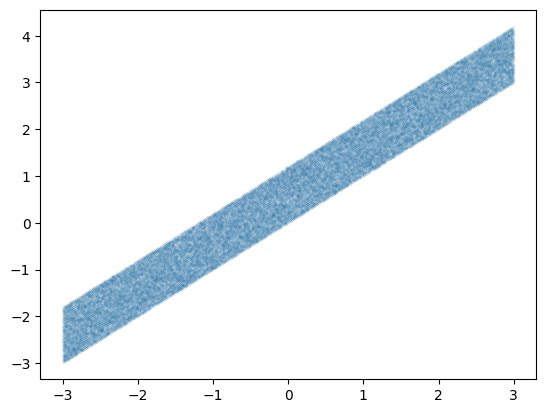

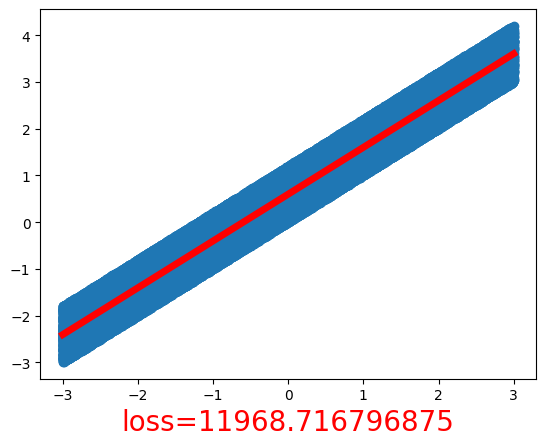

calculate time: 4.466672499998822
final loss:11968.716796875
weights: tensor([1.0009, 0.5996], device='cuda:0')


In [7]:
# 100000个数据样本
x = torch.linspace(-3, 3, 100000, )
X = produce_x(x)
y = x + 1.2*torch.rand(x.size(), )
w = torch.rand(2, )


plt.scatter(x.numpy(), y.numpy(), s=0.001)
plt.show()

inputs, outputs, parameters = try_cuda(X, y, w)
start = perf_counter()
w, loss = train(inputs, outputs, parameters, 10000, learning_rate=1e-6, smooth_rate=1) # 学习率在1e-4时loss会变为nan？梯度爆炸？
finish = perf_counter()
cal_time = finish - start
print(f"calculate time: {cal_time}")
print(f"final loss:{loss.item()}")
print("weights:", w.data)